In [1]:
import os
import re

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from nltk.corpus import wordnet

SRC_PATH="parsed"

# Change the value to True if you want to see the heatmap for correlations
display_correlations = False
display_accuracy_measures = False

In [2]:
def load_housing_data(src=SRC_PATH):
    csv_path = os.path.join(src, "src.csv")
    return pd.read_csv(csv_path)

In [3]:
df = load_housing_data()
df.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
0,Hammurabi,1103,45,44,97,15484,4.0,People
1,Hatshepsut,755,49,18,97,33266,3.0,People
2,Ramesses II,662,43,25,119,32507,2.0,People
3,Cyrus the Great,515,61,32,213,47616,2.0,People
4,Alexander the Great,1910,71,75,401,89053,4.0,People


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       998 non-null    object 
 1   Links       998 non-null    int64  
 2   Categories  998 non-null    int64  
 3   Images      998 non-null    int64  
 4   References  998 non-null    int64  
 5   Length      998 non-null    int64  
 6   Quality     997 non-null    float64
 7   Theme       998 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.5+ KB


In [5]:
df["Theme"].value_counts()

Science                         210
Society and social sciences     146
People                          112
Geography                       106
Technology                       98
History                          83
Everyday life                    57
Philosophy and religion          55
Arts                             45
Mathematics                      45
Health, medicine and disease     41
Name: Theme, dtype: int64

In [6]:
df.describe()

,Links,Categories,Images,References,Length,Quality
count,998.000000,998.000000,998.000000,998.000000,998.000000,997.000000
mean,859.871743,38.109218,41.362725,218.013026,50315.901804,2.749248
std,513.129578,25.571013,37.425723,181.221618,25837.048931,0.959685
min,99.000000,7.000000,2.000000,6.000000,7047.000000,1.000000
25%,477.000000,21.000000,21.000000,86.000000,30272.000000,2.000000
50%,733.000000,30.000000,31.000000,157.000000,46976.500000,3.000000
75%,1140.750000,44.000000,48.750000,297.750000,63421.500000,3.000000
max,3662.000000,153.000000,339.000000,1310.000000,165877.000000,5.000000


In [7]:
if display_correlations:
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True)

In [8]:
# Alternative way of filtering
# df_filtered = df[df["Theme"] == "Arts"]

df_filtered_just_arts = df.query("Theme == 'Arts'")
df_filtered_just_arts.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
301,The arts,1055,23,33,83,21772,2.0,Arts
302,Art,519,30,36,256,57072,2.0,Arts
303,Prehistoric art,849,12,46,80,50775,2.0,Arts
304,Fashion,1548,31,26,104,54418,2.0,Arts
305,Museum,441,29,30,131,44326,2.0,Arts


In [9]:
categories = sorted(set(df['Theme']))

In [10]:
def corr_for_category(category):
    df_filtered = df.query(f"Theme == '{category}'")
    corr_within_category = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category, dtype=bool))
    ax[i].set_title(category)
    sns.heatmap(corr_within_category, mask=mask, annot=True, ax=ax[i])
if display_correlations:
    length = len(categories)
    fig, ax = plt.subplots(length,1, figsize=(6.4, 24))
    i = 0

    # plt.figure(figsize=(6.4, 24))
    for category in categories:
        corr_for_category(category)
        i+=1

    plt.tight_layout()

In [11]:
# Science subset w every attribute
df_science = df.query("Theme == 'Science'")
df_science.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
645,Science,661,32,29,416,45955,3.0,Science
646,Scientific method,769,17,21,151,73762,3.0,Science
647,Measurement,304,16,10,38,20674,2.0,Science
648,International System of Units,681,31,19,195,58608,4.0,Science
649,Nature,746,22,59,207,37866,4.0,Science


In [12]:
df_arts_without_quality = df.query("Theme == 'Arts'")
df_arts_without_quality.drop(columns=["Quality"])
df_arts_without_quality.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
301,The arts,1055,23,33,83,21772,2.0,Arts
302,Art,519,30,36,256,57072,2.0,Arts
303,Prehistoric art,849,12,46,80,50775,2.0,Arts
304,Fashion,1548,31,26,104,54418,2.0,Arts
305,Museum,441,29,30,131,44326,2.0,Arts


In [13]:
df_without_quality = df.drop(columns=["Quality"])
df_without_quality.head()

,Title,Links,Categories,Images,References,Length,Theme
0,Hammurabi,1103,45,44,97,15484,People
1,Hatshepsut,755,49,18,97,33266,People
2,Ramesses II,662,43,25,119,32507,People
3,Cyrus the Great,515,61,32,213,47616,People
4,Alexander the Great,1910,71,75,401,89053,People


In [14]:
def corr_for_old_and_new_category(category):
    df_filtered = df.query(f"Theme == '{category}'")
    corr_within_category_for_df = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category_for_df, dtype=bool))
    ax[i,0].set_title(category)
    sns.heatmap(corr_within_category_for_df, mask=mask, annot=True, ax=ax[i,0])

    df_filtered = df_without_quality.query(f"Theme == '{category}'")
    corr_within_category_for_df_filtered = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category_for_df_filtered, dtype=bool))
    ax[i,1].set_title("without Quality")
    sns.heatmap(corr_within_category_for_df_filtered, mask=mask, annot=True, ax=ax[i,1])
if display_correlations:
    length = len(categories)
    fig, ax = plt.subplots(length,2, figsize=(8, 24))
    i = 0

    for category in categories:
        corr_for_old_and_new_category(category)
        i+=1

    plt.tight_layout()

# Correlation with non-numerical values

In [15]:
df[df.isna().any(axis=1)]

,Title,Links,Categories,Images,References,Length,Quality,Theme
846,Wind,563,11,23,277,41140,NaN,Science


In [16]:
# Drop missing values
df = df.dropna()

In [17]:
df[df.isna().any(axis=1)]

,Title,Links,Categories,Images,References,Length,Quality,Theme


In [18]:
df_all_numerical = df.copy()
df_all_numerical.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
0,Hammurabi,1103,45,44,97,15484,4.0,People
1,Hatshepsut,755,49,18,97,33266,3.0,People
2,Ramesses II,662,43,25,119,32507,2.0,People
3,Cyrus the Great,515,61,32,213,47616,2.0,People
4,Alexander the Great,1910,71,75,401,89053,4.0,People


In [19]:
i = 0
mapping = {}
for category in categories:
    mapping.update({category: i})
    i+=1

df_all_numerical["T.Numerical"] = df_all_numerical.Theme.map(mapping)
df_all_numerical.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme,T.Numerical
0,Hammurabi,1103,45,44,97,15484,4.0,People,6
1,Hatshepsut,755,49,18,97,33266,3.0,People,6
2,Ramesses II,662,43,25,119,32507,2.0,People,6
3,Cyrus the Great,515,61,32,213,47616,2.0,People,6
4,Alexander the Great,1910,71,75,401,89053,4.0,People,6


In [20]:
df_all_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 997
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        997 non-null    object 
 1   Links        997 non-null    int64  
 2   Categories   997 non-null    int64  
 3   Images       997 non-null    int64  
 4   References   997 non-null    int64  
 5   Length       997 non-null    int64  
 6   Quality      997 non-null    float64
 7   Theme        997 non-null    object 
 8   T.Numerical  997 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 77.9+ KB


In [21]:
if display_correlations:
    corr_matrix = df_all_numerical.corr()
    sns.heatmap(corr_matrix, annot=True)

In [22]:
def corr_for_category_all_numerical(category):
    df_filtered = df_all_numerical.query(f"Theme == '{category}'")
    corr_within_category = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category, dtype=bool))
    ax[i].set_title(category)
    sns.heatmap(corr_within_category, mask=mask, annot=True, ax=ax[i])

if display_correlations:
    length = len(categories)
    fig, ax = plt.subplots(length,1, figsize=(6.4, 24))
    i = 0

    # plt.figure(figsize=(6.4, 24))
    for category in categories:
        corr_for_category_all_numerical(category)
        i+=1

    plt.tight_layout()

# Test and Train

Splitting the data before normalization

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
attributes = ["Links", "Categories", "Images", "References", "Length", "Quality"]

X = df[attributes]
Y = df["Theme"]
classes=['Science', 'Society and social sciences', 'People', 'Geography', 'Technology', 'History', 'Everyday life', 'Philosophy and religion', 'Arts', 'Mathematics', 'Health, medicine and disease']
Yb = label_binarize(Y, classes=['Science', 'Society and social sciences', 'People', 'Geography', 'Technology', 'History', 'Everyday life', 'Philosophy and religion', 'Arts', 'Mathematics', 'Health, medicine and disease'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_trainb, X_testb, Y_trainb, Y_testb = train_test_split(X, Yb, test_size=0.2)

n_classes = Yb.shape[1]


print(Y_trainb)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Check for NaN

In [24]:
X_train[X_train.isna().any(axis=1)]

,Links,Categories,Images,References,Length,Quality


# Standardization

After the test split

In [25]:
X_train.head()

,Links,Categories,Images,References,Length,Quality
405,522,26,14,150,41809,2.0
541,272,20,11,33,18606,1.0
860,407,33,23,112,36399,2.0
595,1836,34,44,58,24500,2.0
500,1698,45,44,516,71198,2.0


### Z-score normalization or standardization
Step 1: Standardize the train set

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train),columns = X_train.columns)
X_train_std.head()

,Links,Categories,Images,References,Length,Quality
0,-0.647951,-0.471348,-0.722431,-0.381708,-0.315934,-0.773463
1,-1.127693,-0.704198,-0.802341,-1.033361,-1.208245,-1.823634
2,-0.868633,-0.199690,-0.482701,-0.593356,-0.523985,-0.773463
3,1.873572,-0.160882,0.076668,-0.894119,-0.981581,-0.773463
4,1.608755,0.266010,0.076668,1.656794,0.814269,-0.773463


Step 2: Standardize the test set with the train set's parameters.

In [27]:
X_test.head()

,Links,Categories,Images,References,Length,Quality
271,1393,87,160,472,108053,3.0
881,440,17,13,74,53211,3.0
403,474,33,98,51,24822,2.0
390,1202,27,40,59,75016,3.0
493,785,37,262,77,57406,3.0


In [28]:
X_test_std = pd.DataFrame(sc.transform(X_test),columns = X_test.columns)
X_test_std.head()

,Links,Categories,Images,References,Length,Quality
0,1.023469,1.895958,3.166519,1.411728,2.231591,0.276707
1,-0.805307,-0.820623,-0.749068,-0.805004,0.122549,0.276707
2,-0.740062,-0.199690,1.515047,-0.933106,-0.969198,-0.773463
3,0.656947,-0.432540,-0.029878,-0.888549,0.961097,0.276707
4,-0.143263,-0.044457,5.883456,-0.788295,0.283875,0.276707


### Min-max scaling or normalization
[Doc](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
Step 1: Normalize the train set

In [29]:
X_train.head()

,Links,Categories,Images,References,Length,Quality
405,522,26,14,150,41809,2.0
541,272,20,11,33,18606,1.0
860,407,33,23,112,36399,2.0
595,1836,34,44,58,24500,2.0
500,1698,45,44,516,71198,2.0


In [30]:
# Normalized to a min value of 0 and max value of 1
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_nrml = pd.DataFrame(min_max_scaler.fit_transform(X_train),columns = X_train.columns)
X_train_nrml.head()

,Links,Categories,Images,References,Length,Quality
0,0.118720,0.130137,0.035608,0.107692,0.218863,0.25
1,0.048555,0.089041,0.026706,0.017692,0.072776,0.00
2,0.086444,0.178082,0.062315,0.078462,0.184801,0.25
3,0.487511,0.184932,0.124629,0.036923,0.109885,0.25
4,0.448779,0.260274,0.124629,0.389231,0.403897,0.25


Step 2: Normalize the test set with the train set’s parameters.

In [31]:
X_test.head()

,Links,Categories,Images,References,Length,Quality
271,1393,87,160,472,108053,3.0
881,440,17,13,74,53211,3.0
403,474,33,98,51,24822,2.0
390,1202,27,40,59,75016,3.0
493,785,37,262,77,57406,3.0


In [32]:
X_test_nrml = pd.DataFrame(min_max_scaler.fit_transform(X_test),columns = X_test.columns)
X_test_nrml.head()

,Links,Categories,Images,References,Length,Quality
0,0.537856,0.551724,0.601562,0.500537,0.751357,0.50
1,0.120788,0.068966,0.027344,0.073040,0.324962,0.50
2,0.135667,0.179310,0.359375,0.048335,0.104239,0.25
3,0.454267,0.137931,0.132812,0.056928,0.494495,0.50
4,0.271772,0.206897,1.000000,0.076262,0.357578,0.50


# Support Vector Machine

[SVMDocumentation](https://scikit-learn.org/stable/modules/svm.html)

## Normalized

In [33]:
from sklearn.svm import SVC

svm_nrml = SVC(kernel="linear")
svm_nrml.fit(X_train_nrml, Y_train)

SVC(kernel='linear')

In [34]:
svm_nrml.score(X_train_nrml, Y_train)

0.44165621079046424

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_nrml, X_train_nrml, Y_train, cv=5, scoring="accuracy")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.43 accuracy with a standard deviation of 0.01


In [36]:
svm_nrml.score(X_test_nrml, Y_test)

0.375

### Confusion matrix
[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_pred_nrml = svm_nrml.predict(X_test_nrml)
y_pred_cross = cross_val_predict(svm_nrml, X_test_nrml, Y_test, cv=5)
cmn = confusion_matrix(Y_test, y_pred_nrml)
cmc = confusion_matrix(Y_test, y_pred_cross)

# Include the text
# Problems w class imbalance

C:\Users\Peter\OneDrive - Heriot-Watt University\HW\Semester\3\F21DL - ML\notebook\venv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[Display Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

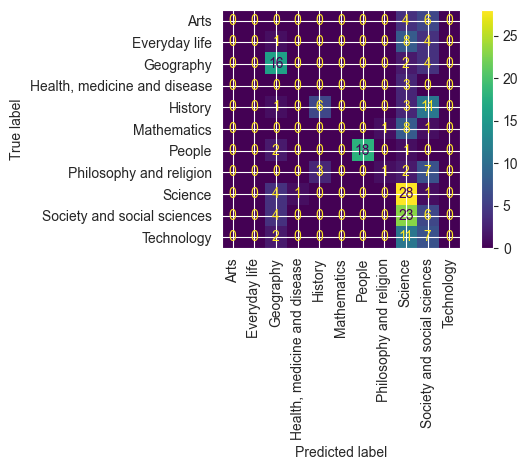

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=svm_nrml.classes_)
disp.plot(xticks_rotation=90)

plt.tight_layout()

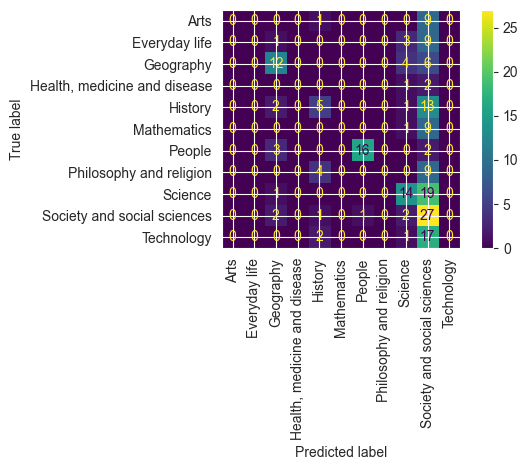

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=svm_nrml.classes_)
disp.plot(xticks_rotation=90)

plt.tight_layout()

## Standardized

In [40]:
svm_std = SVC(kernel="linear")
svm_std.fit(X_train_std, Y_train)

SVC(kernel='linear')

In [41]:
svm_std.score(X_train_std, Y_train)

0.4918444165621079

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_std, X_train_std, Y_train, cv=5, scoring="accuracy")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.45 accuracy with a standard deviation of 0.02


In [43]:
svm_std.score(X_test_std, Y_test)

0.415

### Confusion matrix
[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [44]:
y_pred_std = svm_std.predict(X_test_std)
y_pred_cross = cross_val_predict(svm_std, X_test_std, Y_test, cv=5)
cmn = confusion_matrix(Y_test, y_pred_std)
cmc = confusion_matrix(Y_test, y_pred_cross)


C:\Users\Peter\OneDrive - Heriot-Watt University\HW\Semester\3\F21DL - ML\notebook\venv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[Display Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

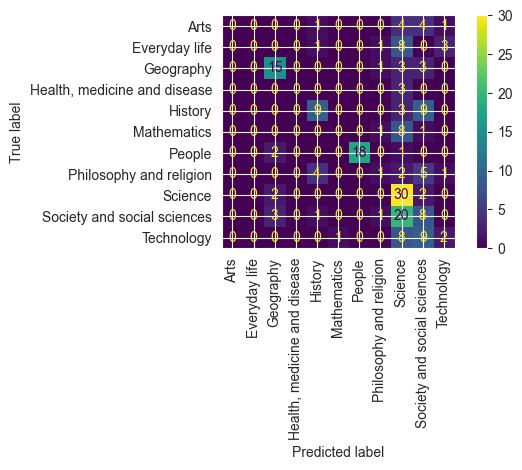

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=svm_std.classes_)
disp.plot(xticks_rotation=90)

plt.tight_layout()

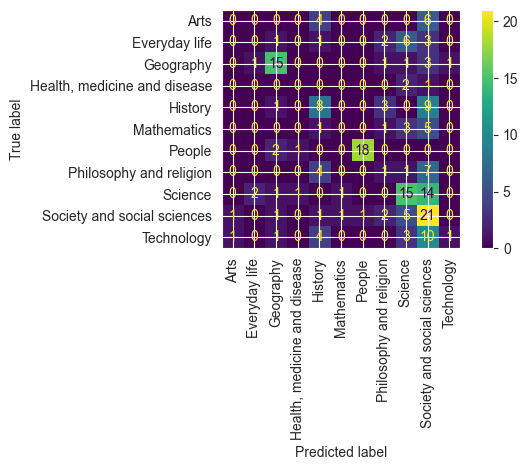

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=svm_std.classes_)
disp.plot(xticks_rotation=90)

plt.tight_layout()

In [47]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_test, y_pred_cross, average='micro')

0.395

In [48]:
recall_score(Y_test, y_pred_cross, average='micro')

0.395

In [49]:
from sklearn.metrics import f1_score

f1_score(Y_test, y_pred_cross, average='micro')

0.395

Precision/Recall Trade-off

In [50]:
y_scores = svm_std.decision_function(X)

In [51]:
# threshold = 0
# y_some_digit_pred = (y_scores > threshold)

In [52]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)

In [53]:
if display_accuracy_measures:
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn import svm, datasets


    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                     random_state=0))
    y_scoresb = classifier.fit(X_trainb, Y_trainb).decision_function(X_testb)



Roc curves


In [54]:
if display_accuracy_measures:
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import precision_recall_curve

    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    precision = dict()
    recall = dict()
    threshold = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_testb[:, i], y_scoresb[:, i])
        precision[i], recall[i], threshold[i] = precision_recall_curve(Y_testb[:, i], y_scoresb[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'pink', 'black', 'white','pink', 'brown'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

In [55]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(threshold[i], precision[i][:-1], color=color, lw=lw,
                 label='Precision of class {0}'
                 ''.format(classes[i]))
        plt.plot(threshold[i], recall[i][:-1], color=color, linestyle='dashed', lw=lw,
                 label='Recall of class {0}'
                   ''.format(classes[i]))

    plt.xlabel('Threshold')
    plt.title('Precision and recall evolution with threshold')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [56]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(precision[i], recall[i], color=color, lw=lw,
                 label='Precision vs recall of class {0}'
                 ''.format(classes[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs recall')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [57]:
if display_accuracy_measures:
    from sklearn.ensemble import RandomForestClassifier
    forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

    y_scores_forest = cross_val_predict(forest_clf, X_testb, Y_testb, cv=5,
                                        method="predict_proba")

In [58]:
if display_accuracy_measures:
    fpr_forest = dict()
    tpr_forest = dict()
    thresholds_forest = dict()

    for i in range(n_classes):
        fpr_forest[i], tpr_forest[i], thresholds_forest[i] = roc_curve(Y_testb[:, i], y_scores_forest[i][:, 1])



In [59]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr_forest[i], tpr_forest[i], color=color, lw=lw,
                 label='ROC forest curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data with forest classifier')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [60]:
if display_accuracy_measures:
    y_pred_std = svm_std.predict(X_test_std)
    y_pred_cross = cross_val_predict(svm_std, X_test_std, Y_test, cv=5)
    cmn = confusion_matrix(Y_test, y_pred_std)
    cmc = confusion_matrix(Y_test, y_pred_cross)


[Display Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

In [61]:
if display_accuracy_measures:
    disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=svm_std.classes_)
    disp.plot(xticks_rotation=90)

    plt.tight_layout()

In [62]:
if display_accuracy_measures:
    disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=svm_std.classes_)
    disp.plot(xticks_rotation=90)

    plt.tight_layout()

In [63]:
if display_accuracy_measures:
    from sklearn.metrics import precision_score, recall_score

    precision_score(Y_test, y_pred_cross, average='micro')

In [64]:
if display_accuracy_measures:
    recall_score(Y_test, y_pred_cross, average='micro')

In [65]:
if display_accuracy_measures:
    from sklearn.metrics import f1_score

    f1_score(Y_test, y_pred_cross, average='micro')

Precision/Recall Trade-off

In [66]:
if display_accuracy_measures:
    y_scores = svm_std.decision_function(X)

In [67]:
# threshold = 0
# y_some_digit_pred = (y_scores > threshold)

In [68]:
if display_accuracy_measures:
    threshold = 8000
    y_some_digit_pred = (y_scores > threshold)

In [69]:
if display_accuracy_measures:
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn import svm, datasets


    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                     random_state=0))
    y_scoresb = classifier.fit(X_trainb, Y_trainb).decision_function(X_testb)



Roc curves


In [70]:
if display_accuracy_measures:
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import precision_recall_curve

    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    precision = dict()
    recall = dict()
    threshold = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_testb[:, i], y_scoresb[:, i])
        precision[i], recall[i], threshold[i] = precision_recall_curve(Y_testb[:, i], y_scoresb[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'pink', 'black', 'white','pink', 'brown'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

In [71]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(threshold[i], precision[i][:-1], color=color, lw=lw,
                 label='Precision of class {0}'
                 ''.format(classes[i]))
        plt.plot(threshold[i], recall[i][:-1], color=color, linestyle='dashed', lw=lw,
                 label='Recall of class {0}'
                   ''.format(classes[i]))

    plt.xlabel('Threshold')
    plt.title('Precision and recall evolution with threshold')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [72]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(precision[i], recall[i], color=color, lw=lw,
                 label='Precision vs recall of class {0}'
                 ''.format(classes[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs recall')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [73]:
if display_accuracy_measures:
    from sklearn.ensemble import RandomForestClassifier
    forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

    y_scores_forest = cross_val_predict(forest_clf, X_testb, Y_testb, cv=5,
                                        method="predict_proba")

In [74]:
if display_accuracy_measures:

    fpr_forest = dict()
    tpr_forest = dict()
    thresholds_forest = dict()

    for i in range(n_classes):
        fpr_forest[i], tpr_forest[i], thresholds_forest[i] = roc_curve(Y_testb[:, i], y_scores_forest[i][:, 1])



In [75]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr_forest[i], tpr_forest[i], color=color, lw=lw,
                 label='ROC forest curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data with forest classifier')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [76]:
if display_accuracy_measures:
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(svm_std, X_train_std, Y_train, cv=5, scoring="accuracy")
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [77]:
if display_accuracy_measures:
    svm_std.score(X_test_std, Y_test)

### Confusion matrix
[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [78]:
if display_accuracy_measures:
    y_pred_std = svm_std.predict(X_test_std)
    y_pred_cross = cross_val_predict(svm_std, X_test_std, Y_test, cv=5)
    cmn = confusion_matrix(Y_test, y_pred_std)
    cmc = confusion_matrix(Y_test, y_pred_cross)


[Display Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

In [79]:
if display_accuracy_measures:
    disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=svm_std.classes_)
    disp.plot(xticks_rotation=90)

    plt.tight_layout()

In [80]:
if display_accuracy_measures:
    disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=svm_std.classes_)
    disp.plot(xticks_rotation=90)

    plt.tight_layout()

In [81]:
if display_accuracy_measures:
    from sklearn.metrics import precision_score, recall_score

    precision_score(Y_test, y_pred_cross, average='micro')

In [82]:
if display_accuracy_measures:
    recall_score(Y_test, y_pred_cross, average='micro')

In [83]:
if display_accuracy_measures:
    from sklearn.metrics import f1_score

    f1_score(Y_test, y_pred_cross, average='micro')

Precision/Recall Trade-off

In [84]:
if display_accuracy_measures:
    y_scores = svm_std.decision_function(X)

In [85]:
# threshold = 0
# y_some_digit_pred = (y_scores > threshold)

In [86]:
if display_accuracy_measures:
    threshold = 8000
    y_some_digit_pred = (y_scores > threshold)

In [87]:
if display_accuracy_measures:
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn import svm, datasets


    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                     random_state=0))
    y_scoresb = classifier.fit(X_trainb, Y_trainb).decision_function(X_testb)



Roc curves


In [88]:
if display_accuracy_measures:
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import precision_recall_curve

    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    precision = dict()
    recall = dict()
    threshold = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_testb[:, i], y_scoresb[:, i])
        precision[i], recall[i], threshold[i] = precision_recall_curve(Y_testb[:, i], y_scoresb[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'pink', 'black', 'white','pink', 'brown'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

In [89]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(threshold[i], precision[i][:-1], color=color, lw=lw,
                 label='Precision of class {0}'
                 ''.format(classes[i]))
        plt.plot(threshold[i], recall[i][:-1], color=color, linestyle='dashed', lw=lw,
                 label='Recall of class {0}'
                   ''.format(classes[i]))

    plt.xlabel('Threshold')
    plt.title('Precision and recall evolution with threshold')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [90]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(precision[i], recall[i], color=color, lw=lw,
                 label='Precision vs recall of class {0}'
                 ''.format(classes[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs recall')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [91]:
if display_accuracy_measures:
    from sklearn.ensemble import RandomForestClassifier
    forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

    y_scores_forest = cross_val_predict(forest_clf, X_testb, Y_testb, cv=5,
                                        method="predict_proba")

In [92]:
if display_accuracy_measures:

    fpr_forest = dict()
    tpr_forest = dict()
    thresholds_forest = dict()

    for i in range(n_classes):
        fpr_forest[i], tpr_forest[i], thresholds_forest[i] = roc_curve(Y_testb[:, i], y_scores_forest[i][:, 1])



In [93]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr_forest[i], tpr_forest[i], color=color, lw=lw,
                 label='ROC forest curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data with forest classifier')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [94]:
if display_accuracy_measures:
    y_pred_std = svm_std.predict(X_test_std)
    y_pred_cross = cross_val_predict(svm_std, X_test_std, Y_test, cv=5)
    cmn = confusion_matrix(Y_test, y_pred_std)
    cmc = confusion_matrix(Y_test, y_pred_cross)


[Display Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

In [95]:
if display_accuracy_measures:
    disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=svm_std.classes_)
    disp.plot(xticks_rotation=90)

    plt.tight_layout()

In [96]:
if display_accuracy_measures:
    disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=svm_std.classes_)
    disp.plot(xticks_rotation=90)

    plt.tight_layout()

In [97]:
if display_accuracy_measures:
    from sklearn.metrics import precision_score, recall_score

    precision_score(Y_test, y_pred_cross, average='micro')

In [98]:
if display_accuracy_measures:
    recall_score(Y_test, y_pred_cross, average='micro')

In [99]:
if display_accuracy_measures:
    from sklearn.metrics import f1_score

    f1_score(Y_test, y_pred_cross, average='micro')

Precision/Recall Trade-off

In [100]:
if display_accuracy_measures:
   y_scores = svm_std.decision_function(X)

In [101]:
    # threshold = 0
    # y_some_digit_pred = (y_scores > threshold)

In [102]:
if display_accuracy_measures:
    threshold = 8000
    y_some_digit_pred = (y_scores > threshold)

In [103]:
if display_accuracy_measures:
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn import svm, datasets


    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                     random_state=0))
    y_scoresb = classifier.fit(X_trainb, Y_trainb).decision_function(X_testb)



Roc curves


In [104]:
if display_accuracy_measures:
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import precision_recall_curve

    if display_accuracy_measures:
        lw = 2
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        precision = dict()
        recall = dict()
        threshold = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(Y_testb[:, i], y_scoresb[:, i])
            precision[i], recall[i], threshold[i] = precision_recall_curve(Y_testb[:, i], y_scoresb[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'pink', 'black', 'white','pink', 'brown'])

        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(classes[i], roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([-0.05, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic for multi-class data')
        plt.legend(loc="lower right")
        plt.show()

In [105]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(threshold[i], precision[i][:-1], color=color, lw=lw,
                 label='Precision of class {0}'
                 ''.format(classes[i]))
        plt.plot(threshold[i], recall[i][:-1], color=color, linestyle='dashed', lw=lw,
                 label='Recall of class {0}'
                   ''.format(classes[i]))

    plt.xlabel('Threshold')
    plt.title('Precision and recall evolution with threshold')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [106]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(precision[i], recall[i], color=color, lw=lw,
                 label='Precision vs recall of class {0}'
                 ''.format(classes[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs recall')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [107]:
if display_accuracy_measures:
    from sklearn.ensemble import RandomForestClassifier
    forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

    y_scores_forest = cross_val_predict(forest_clf, X_testb, Y_testb, cv=5,
                                        method="predict_proba")

In [108]:
if display_accuracy_measures:
    fpr_forest = dict()
    tpr_forest = dict()
    thresholds_forest = dict()

    for i in range(n_classes):
        fpr_forest[i], tpr_forest[i], thresholds_forest[i] = roc_curve(Y_testb[:, i], y_scores_forest[i][:, 1])



In [109]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr_forest[i], tpr_forest[i], color=color, lw=lw,
                 label='ROC forest curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data with forest classifier')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [110]:
# Importing the necessary functions
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
import re, string


def lemmatise(text):
    """Returns lemmatised tokens from the text."""
    """Based on our lab3_preprocessing.ipynb code."""
    text = text.lower().strip()
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    # We will use a tokenizer from the NLTK library
    filtered_sentence = []
    # Stop word lists can be adjusted for your problem
    stop_words = nltk.corpus.stopwords.words('english')

    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)

    # Initialize the lemmatizer
    wl = WordNetLemmatizer()

    # This is a helper function to map NTLK position tags
    # Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

    lemmatized_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    return lemmatized_sentence

In [111]:
from wikipedia_page_data_fetcher import get_article_data_from_file
import os

# assign directory
directory = 'articles'

LIST_OF_ARTICLES = [x.removesuffix(".txt") for x in os.listdir(directory)]
# LIST_OF_ARTICLES = ["0", "Aircraft"]
all_article_data = {name: get_article_data_from_file(name, use_lemmatised_version = False) for name in LIST_OF_ARTICLES}

word_list = []
article_list = {}
start_of_lines = "####### SUMMARY"
end_of_line = "####### CONTENT"

for filename in LIST_OF_ARTICLES:
    summary = lemmatise(all_article_data[filename]["Summary"])
    article_list[filename] = summary
    word_list.append(summary)


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Peter\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Peter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Peter\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Peter\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [112]:
# Flatten the word list
import functools
import operator
word_list = functools.reduce(operator.concat, word_list)

In [113]:
from collections import Counter

# import matlab.mode
# [my_value,my_frequency]= mode(word_list)
# Counter(word_list).most_common()

freq = Counter(word_list)
freq = sorted(freq, key=freq.get, reverse=True)
freq

['use',
 'include',
 'also',
 'world',
 'century',
 'one',
 'form',
 'many',
 'state',
 'large',
 'system',
 'human',
 'may',
 'first',
 'country',
 'know',
 'call',
 'time',
 'number',
 'early',
 'language',
 'city',
 'year',
 'modern',
 'often',
 'empire',
 'term',
 'become',
 'area',
 'two',
 'make',
 'million',
 'war',
 'people',
 'part',
 'new',
 'work',
 'well',
 'earth',
 'study',
 'power',
 'age',
 'period',
 'history',
 'high',
 'culture',
 'lead',
 'great',
 'life',
 'social',
 'begin',
 '1',
 'develop',
 'science',
 'development',
 'region',
 'process',
 'different',
 'europe',
 'population',
 'natural',
 'group',
 'water',
 'east',
 'energy',
 'political',
 'since',
 'consider',
 'around',
 'asia',
 'western',
 'theory',
 'ancient',
 '000',
 'european',
 'art',
 'cause',
 'south',
 'type',
 'write',
 'major',
 'change',
 'specie',
 'base',
 'animal',
 'result',
 'body',
 'various',
 'united',
 'example',
 'chemical',
 'within',
 'greek',
 'follow',
 'force',
 'field',
 'nam

In [114]:
vocabulary = freq[:5000]
vocabulary

# ToDo: Improve stop words

['use',
 'include',
 'also',
 'world',
 'century',
 'one',
 'form',
 'many',
 'state',
 'large',
 'system',
 'human',
 'may',
 'first',
 'country',
 'know',
 'call',
 'time',
 'number',
 'early',
 'language',
 'city',
 'year',
 'modern',
 'often',
 'empire',
 'term',
 'become',
 'area',
 'two',
 'make',
 'million',
 'war',
 'people',
 'part',
 'new',
 'work',
 'well',
 'earth',
 'study',
 'power',
 'age',
 'period',
 'history',
 'high',
 'culture',
 'lead',
 'great',
 'life',
 'social',
 'begin',
 '1',
 'develop',
 'science',
 'development',
 'region',
 'process',
 'different',
 'europe',
 'population',
 'natural',
 'group',
 'water',
 'east',
 'energy',
 'political',
 'since',
 'consider',
 'around',
 'asia',
 'western',
 'theory',
 'ancient',
 '000',
 'european',
 'art',
 'cause',
 'south',
 'type',
 'write',
 'major',
 'change',
 'specie',
 'base',
 'animal',
 'result',
 'body',
 'various',
 'united',
 'example',
 'chemical',
 'within',
 'greek',
 'follow',
 'force',
 'field',
 'nam

In [115]:
#debug
adsadsadsadsa = 1